In [1]:
#importing necessary packages, pandas and numpy for data processing, matplotlib and seaborn for plotting graphs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
##read in the data and have an initial look
df = pd.read_csv('data.csv', delimiter = ',')
df.head(20)

,dattime,client,country,ad_type,total_impressions,total_value
0,2021-06-06*06:00:00,1,EST,2,137,0.137000
1,2021-06-12*22:00:00,2,DZA,2,4424,91.720657
2,2021-06-05*20:00:00,1,NCL,2,271,0.271000
3,2021-06-23*17:00:00,1,EST,17,1,0.001000
4,2021-06-02*10:00:00,3,NCL,2,11701,4.871900
5,2021-06-11*16:00:00,4,DZA,2,1496,0.308200
6,2021-06-19*08:00:00,5,DZA,10,16,0.160000
7,2021-06-20*03:00:00,6,DZA,10,1,0.024500
8,2021-06-03*21:00:00,7,NCL,10,8,0.184000
9,2021-06-21*15:00:00,8,DZA,17,1,0.002000


<h1>Explanatory Analysis</h1>

1. We are looking at a table which contains 6 columns and 96,223 entries. Out of the 6 variables, there are 3 category variables: client id, country code, and Ad type id. 2 numerical variables: total impressions and total values. Plus one date time variable.

In [3]:
##from the below information we can see not all categorical variables are in the correct format
df.info()

#converting client and ad_type into string variables for better analysis later
def convert_format(dimension):
    df[dimension] = [str(x) for x in df[dimension]]
convert_format('client')
convert_format('ad_type')

#might impact file size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96223 entries, 0 to 96222
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dattime            96223 non-null  object 
 1   client             96223 non-null  int64  
 2   country            96223 non-null  object 
 3   ad_type            96223 non-null  int64  
 4   total_impressions  96223 non-null  int64  
 5   total_value        96223 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.4+ MB


2. Now we can take a general look at the categorical variables.

In [4]:
#counting the different numbers of clients that have been exposed to by every country
def category_variable(dimension):
    print(df.groupby(dimension)['client'].nunique().sort_values(ascending=False).reset_index(name= f"Client numbers by {dimension}"))
category_variable('country')

  country  Client numbers by country
0     EST                         52
1     NCL                         47
2     ISL                         45
3     DZA                         40
4    ISL1                          1
5  NCLNCL                          1


We have 6 countries in the dataset in total, except from ISL1 and NCLNCL which only have impressions shown to one client, the rest 4 countries have had impressions shown to around 40 - 52 clients.

In [5]:
#counting the different numbers of clients that have been exposed to by every ad type.
category_variable('ad_type')

  ad_type  Client numbers by ad_type
0      10                         69
1       2                         53
2      17                         37
3      15                         11


We have 4 different ad types in the dataset in total, type 10 and type 2 have been shown to more clients while type 17 and type 15 have been shown to less.


Here we move on to look at the datetime column

In [6]:
#checking how many records are under each date and the ranges of the date
def date_format(column,new_date):
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%d*%H:%M:%S')
    ##extracting dates out of the datetime variable
    df[new_date] = [x.date() for x in df[column]]
    print(df[new_date].value_counts())
    

date_format('dattime','Date')   

2021-06-26    3730
2021-06-24    3656
2021-06-29    3602
2021-06-25    3575
2021-06-23    3565
2021-06-27    3500
2021-06-28    3492
2021-06-22    3460
2021-06-21    3441
2021-06-16    3320
2021-06-17    3318
2021-06-18    3315
2021-06-09    3313
2021-06-19    3298
2021-06-04    3297
2021-06-06    3286
2021-06-11    3268
2021-06-05    3267
2021-06-03    3229
2021-06-08    3222
2021-06-20    3221
2021-06-10    3210
2021-06-07    3208
2021-06-15    3176
2021-06-12    3136
2021-06-02    3094
2021-06-14    3059
2021-06-13    3053
2021-06-01    2911
2006-06-12       1
Name: Date, dtype: int64


Apart from one entry with the date '2006-06-12', all entries were taken in June, 2021 and each date has around 3000 - 4000 data entries. We believe the entry with the date '2006-06-12' is out of range and could have been mistaken when recording , therefore we take out this data point for future calculation accuracy.

In [7]:
#finding out the dataframe index of the value needed to be deleted and delete from dataframe
def delete_date(datetime):
    idx_names = df[df.Date == datetime].index
    df.drop(idx_names, inplace=True)
    df.reset_index()
#since there is only one invalid date which was too early, we are deleting the record with the earliest date
datetime = min(df['Date'])
delete_date(datetime)

#confirming the invalid date has been deleted
df['Date'].value_counts()

2021-06-26    3730
2021-06-24    3656
2021-06-29    3602
2021-06-25    3575
2021-06-23    3565
2021-06-27    3500
2021-06-28    3492
2021-06-22    3460
2021-06-21    3441
2021-06-16    3320
2021-06-17    3318
2021-06-18    3315
2021-06-09    3313
2021-06-19    3298
2021-06-04    3297
2021-06-06    3286
2021-06-11    3268
2021-06-05    3267
2021-06-03    3229
2021-06-08    3222
2021-06-20    3221
2021-06-10    3210
2021-06-07    3208
2021-06-15    3176
2021-06-12    3136
2021-06-02    3094
2021-06-14    3059
2021-06-13    3053
2021-06-01    2911
Name: Date, dtype: int64

Further looking into the number of total impressions shown to a client and the total values a client pays at a given time.

In [8]:
df.describe()

,total_impressions,total_value
count,96222.000000,96222.000000
mean,4045.404679,4.001687
std,31901.139743,15.082753
min,-4502.000000,0.000000
25%,7.000000,0.020100
50%,42.000000,0.140000
75%,378.000000,1.104278
max,941289.000000,846.000000


We can see in total impressions there are some negative values which are invalid, since clients can only be shown a positive amount of advertisements at a given time, we will delete these invalid data entries. Total values column seems to have no invalid value.

In [9]:
#delete records with negative numbers of impressions
def delete_impression():
    idx_names = df[df.total_impressions <= 0].index
    df.drop(idx_names, inplace=True)
    df.reset_index()
delete_impression()
df.describe()

,total_impressions,total_value
count,96220.000000,96220.000000
mean,4045.535554,4.001708
std,31901.456722,15.082903
min,1.000000,0.000000
25%,7.000000,0.020100
50%,42.000000,0.140000
75%,378.000000,1.104093
max,941289.000000,846.000000


From the dataframe with invalid impressions being deleted, we can see following:
- total impressions range between 1 to 941289, crossing a rather considerable range, the average impressions of the records is 4045.5 impressions, however the median is only 42.
- total value range between 0 to 846, also crossing a rather considerable range, the average value of the records is 4 cents, however the median is only 0.14. 
Here we suspect that the distributions of total impressions and total value could be skewed.

In [10]:
# seaborn histogram
def hist_plot(df,dimension):
    sns.distplot(df[dimension], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'}).set(title = f"Count of {dimension}")

C:\Users\sydne\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


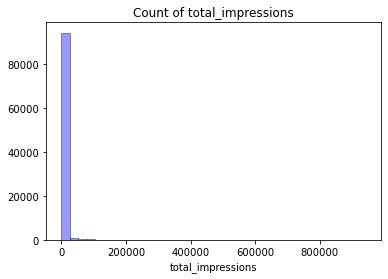

In [11]:
hist_plot(df,'total_impressions')

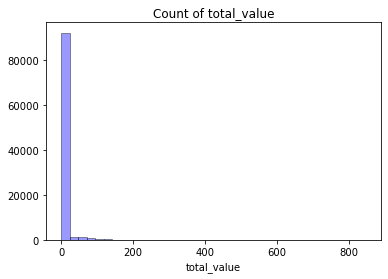

In [12]:
hist_plot(df,'total_value')

Plotting the corresponding histogram of total impressions and total value, we can conclude both variables are right skewed.

Now we take a look at the distribution of the impressions, first we would like to see how advertisements were shown in different countries.

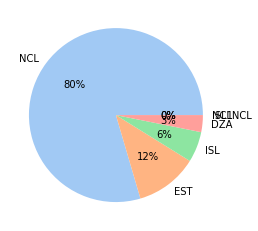

In [13]:
#calculate the total impressions shown in every country
df_country = df.groupby(['country'])['total_impressions'].sum().sort_values(ascending=False).reset_index(name= f"total_impressions")

#create a pie chart for the distribution of the impressions
def pie_plot(data,label):
    data = data
    labels = label

#define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:len(labels)]

#create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    plt.show()
pie_plot(df_country['total_impressions'],df_country['country'])    

80% of the advertisements were shown in the country NCL, making up the majority of the impressions. 12% in EST, 6% in ISL, 3% in DZA, while the rest 2 countries almost account to none. We suggest country NCL could have a greater population or audience base for the advertisements.

Similarly as the distribution of impressions by country, we can also look at impressions by ad type.

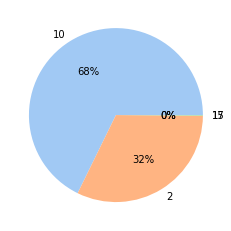

In [14]:
#calculate the amount of impressions shown in every ad type and create a pie chart
df_ad = df.groupby(['ad_type'])['total_impressions'].sum().sort_values(ascending=False).reset_index(name= f"total_impressions")
pie_plot(df_ad['total_impressions'],df_ad['ad_type'])   

More than half of the advertisements have the ad_type 10, making the most popular advertisement type, ad_type 2 also make up a big part of the total impressions. While the 2 other types almost account to none. We suggest advertisement type 10 could be the most popular format among advertisements.

Now we move on to the distribution of the total amounts clients have been paying for the impressions. First we look at the total values clients paid by country.

Text(0.5, 1.0, 'Total amounts payed by country')

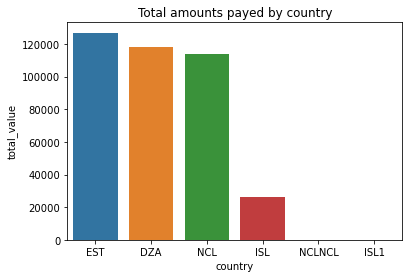

In [15]:
#calculate the amount paid in different countries and create a bar chart
df_con_val = df.groupby(['country'])['total_value'].sum().sort_values(ascending=False).reset_index(name= f"total_value")
sns.barplot(data=df_con_val, x="country", y="total_value").set_title("Total amounts payed by country")

It is interesting to see although in country NCL impressions were shown the most, EST and DZA's clients have been paying more for the advertisements shown. We suggest in countries such as EST and DZA clients might have a better click through rate or conversion rate (depending on the model).

Text(0.5, 1.0, 'Total amounts payed by advertisement type')

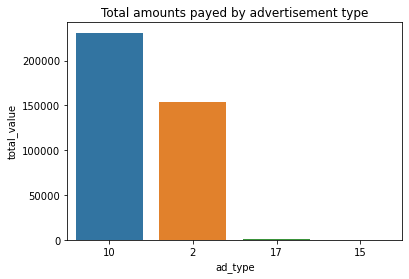

In [16]:
#calculate the amount paid in different ad types and create a bar chart
df_ad_val = df.groupby(['ad_type'])['total_value'].sum().sort_values(ascending=False).reset_index(name= f"total_value")
sns.barplot(data=df_ad_val, x="ad_type", y="total_value").set_title("Total amounts payed by advertisement type")

Not surprisingly, more amounts have been payed for advertisement type 10 and 2.
We now conclude for the explanatory analysis part.

<h1>Analysis of eCPM</h1>

In [17]:
#calculate the ecpm under different parameters, in groups we can put the variables that we want to breakdown ecpm in

def calc_ecpm(df, groups):
    #calculate the total impressions broken down (e.g. by country and ad_type)
    impression = df.groupby(groups)['total_impressions'].sum().reset_index()
    
    #calculate the total amount spent broken down (e.g. by country and ad_type)
    cost = df.groupby(groups)['total_value'].sum().reset_index()
 
    cost['total_impressions'] = impression['total_impressions']
    #ecpm equals the total amount spent of one country and one ad_type times 1000 over the total impressions
    cost['ecpm'] = cost['total_value'] * 1000 / cost['total_impressions']
    return cost

#calculate the ecpm of different countries and ad types
ecpm_total = calc_ecpm(df, ['country', 'ad_type']) 
ecpm_total

,country,ad_type,total_value,total_impressions,ecpm
0,DZA,10,66507.476094,7764619,8.565453
1,DZA,15,16.713391,5546,3.013594
2,DZA,17,42.245708,17440,2.422346
3,DZA,2,51331.605784,4481430,11.454292
4,EST,10,85811.505606,30524398,2.811243
5,EST,15,23.717400,22860,1.037507
6,EST,17,199.504492,83612,2.386075
7,EST,2,40868.109334,14593959,2.800344
8,ISL,10,14342.543962,15694153,0.913878
9,ISL,15,6.634900,5117,1.296639


In [18]:
#calculate the ecpm by country
ecpm_country = calc_ecpm(df, ['country']) 
ecpm_country

,country,total_value,total_impressions,ecpm
0,DZA,117898.040977,12269035,9.609398
1,EST,126902.836831,45224829,2.806043
2,ISL,26523.063848,22119676,1.199071
3,ISL1,0.031105,6,5.184167
4,NCL,113720.307092,309647872,0.367257
5,NCLNCL,0.037000,13,2.846154


<b> Country DZA has the highest ecpm of all countries 9.6 cents. </b>

In [19]:
#calculate ecpm by ad type
ecpm_ad_type = calc_ecpm(df, ['ad_type']) 
ecpm_ad_type

,ad_type,total_value,total_impressions,ecpm
0,10,231066.524818,263716755,0.876192
1,15,95.286065,69652,1.368031
2,17,477.318881,448198,1.064973
3,2,153405.187091,125026826,1.226978


<b>Ad type 15 has the highest ecpm 1.36 cents.</b>

To conclude, although country NCL has the most impressions shown, country DZA has the most amount paid, which could implicate it could be the most effective country for the advertisements.

In addition, ecpm fluctuates greatly among countries but not with ad type, indicating the demographics of the users might have a bigger influence on ecpm.

<h1> Temporal Analysis </h1>

<h3> Daily Analysis for DZA <h3/>

In [20]:
#calculate the ecpm for country DZA for each day and ad type
df_dza = df[df['country'] == 'DZA']
ecpm_dza = calc_ecpm(df_dza, ['Date','ad_type'])


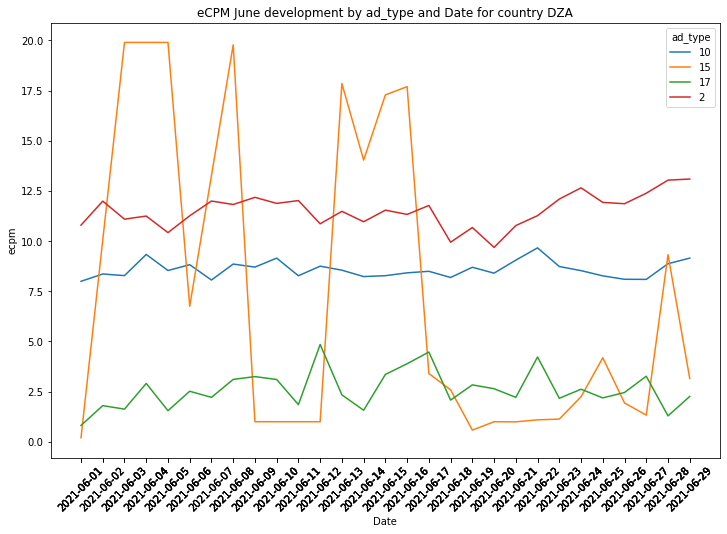

In [21]:
#plot combined line charts for the ecpm throughout the month by different ad types
def plot_ecpm(value,dimension_1, dimension_2, df):

    fig, ax = plt.subplots(figsize=(12, 8))
 
    sns.lineplot(x = dimension_1, y = value, hue = dimension_2, data = df, ax = ax)
    ax.set(xticks = df[dimension_1].values)
    ax.tick_params(axis ='x', rotation = 45)
    ax.set_title(f"eCPM June development by {dimension_2} and {dimension_1} for country DZA")

plot_ecpm('ecpm', 'Date', 'ad_type', ecpm_dza)

The ecpm development daily by ad type is shown above. We can conclude below:
- while ad type 2, 10, 17 have less turbulent ecpm throughout June, ad type 15's ecpm is highly fluctuating, with periods where ecpm almost reach zero, and other days with extremely high ecpm. We can consider validating the data for advertisement 15 to see if our data has been collected correctly or if there is some mistakes in recording the data.
- Through out the period ad type 2 seems to have the highest ecpm, and both 2 and 10 seem to experience a slight drop in the middle of the month and slight increase towards the end of the month. We can replicate the same data collection process among other months to see if this could be a recurrent seasonality behavior.


<h3> Hourly Analysis for NCL <h3/>

<ipython-input-22-757a45216a10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ncl['Hour'] = [x.hour for x in df_ncl['dattime']]


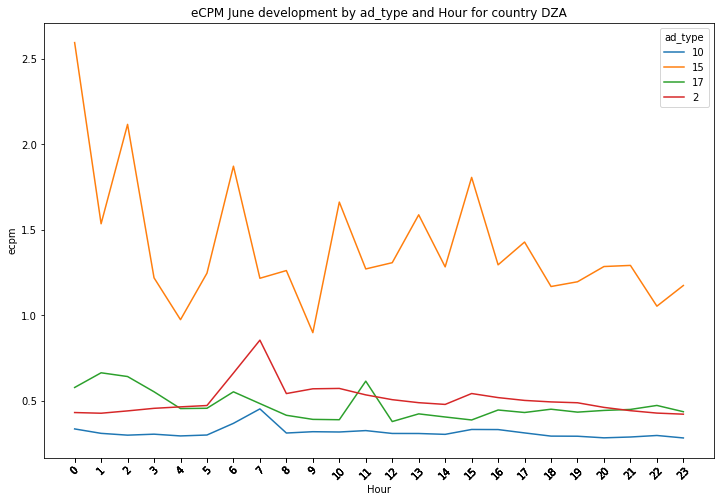

In [22]:
#calculate hourly ecpm from all data available for country NCL by ad type and plot line chart
df_ncl = df[df['country'] == 'NCL']
df_ncl['Hour'] = [x.hour for x in df_ncl['dattime']]
ecpm_ncl = calc_ecpm(df_ncl, ['Hour','ad_type'])
plot_ecpm('ecpm', 'Hour', 'ad_type', ecpm_ncl)

- Ad type 15 also has the highest hourly ecpm, however we might need further validation to confirm this finding.
- Among the three other ad types, 17 seems to be paid the most in night time and past midnight while type 2 gets paid the most during the rest of the day (except from 11). We suggest ad type 17 could be a popular ad type when people are off work and is most engaging while people get off work during lunch break and back home.
- All three ad types seem to peak around 6-7 am, we can also try to replicate the data in other months to see if there is time of day effect.

To conclude, although type 10 advertisement has the most impressions shown to clients, type 2 seem to have a higher and stable ecpm, which means type 2 ad could have a better engagement to its audience. There seems to be pattern to be further explored for the day of the month and hour of the day effect, data of the other months could be collected to provide further analysis.

<h1> Prediction of future eCPM </h1>

In [23]:
#calculate the ecpm for all dates, country and ad type.
ecpm_total = calc_ecpm(df, ['Date','country', 'ad_type']) 
ecpm_total

,Date,country,ad_type,total_value,total_impressions,ecpm
0,2021-06-01,DZA,10,2311.174932,289033,7.996232
1,2021-06-01,DZA,15,0.019400,97,0.200000
2,2021-06-01,DZA,17,0.685411,840,0.815966
3,2021-06-01,DZA,2,1756.339772,162687,10.795821
4,2021-06-01,EST,10,2385.000243,968464,2.462663
...,...,...,...,...,...,...
450,2021-06-29,ISL,2,262.591239,190337,1.379612
451,2021-06-29,NCL,10,3869.641210,6960787,0.555920
452,2021-06-29,NCL,15,3.974600,2838,1.400493
453,2021-06-29,NCL,17,9.777759,10691,0.914579


For predicting the future ecpm, <b>we suggest to use an ARIMAX model.</b>

The ARIMAX (AutoRegressive Integrated Moving Average with exogenous variables) model is a time series model that incorporates the effect of one or more external variables in addition to the past values of the time series itself.

In this case, we are not only looking at history ecpm values, but also we can take into considerations other exogenous variables such as country, ad type. The model would use these variables to capture any relationship between them and the ecpm, and make predictions based on those relationships.

In addition, due to our small dataset, we recommend to utilize a cross-validation measure of the model, in order to evaluate the model training result and increase robustness of our model.

In the model we are going to use, there are three main parameters:

<b>p</b>: The autoregressive order, which represents how many past values we are using to predict future values.

<b>d</b>: The degree of differencing, which represents the number of times the data is differenced in order to make it stationary. This is a quite technical concept which explanations will be omitted here.

<b>q</b>: The moving average order, which represents the number of  forecast errors (residuals) to include in the model. 

Together, these parameters determine the structure of the ARIMA model and allow it to capture the temporal dependence and stationary properties of a time series.

In [24]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Load data
data = ecpm_total

# Convert datetime to index
data = data.set_index('Date')

# Define input variables and target variable
input_vars = ['country', 'ad_type']
target_var = 'ecpm'

# Create one-hot encoded features for country and advertisement type
data = pd.get_dummies(data, columns=input_vars)

# Define the number of folds for cross-validation
n_splits = 5

# Split data into training and testing sets using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)
splits = tscv.split(data)

# Perform cross-validation
mse_list = []
preds_list = []
for train_index, test_index in splits:
    
    # Split data into training and testing sets
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]
    
    # Define the ARIMA model
    model = ARIMA(train_data[target_var], order=(1,0,1))
    
    # Fit the ARIMA model to the training data
    model_fit = model.fit()
    
    # Make predictions for the testing data
    preds = model_fit.forecast(steps=1)
    
    
    # Extract the predicted eCPM value for the next day
    #pred_ecpm = preds[0]
    pred_ecpm = preds
    preds_list.append(preds)
    # Extract the actual eCPM value for the next day
    actual_ecpm = test_data[target_var][0]
    
    # Calculate the mean squared error
    mse = mean_squared_error([actual_ecpm], [pred_ecpm])
    
    mse_list.append(mse)
    
mean_preds = np.mean(preds_list)
mean_mse = np.mean(mse_list)
    # Print the mean squared error
print('Prediction: ',mean_preds)
print('MSE: ', mse)


C:\Users\sydne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sydne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sydne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sydne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

Prediction:  3.3984627773357965
MSE:  5.033246290799686


The predicted next day ecpm is 3.24 cent, which falls under normal range, however our mean squared error is 5 cents, this is quite far off for our predicted value, which means <b>the performance of the ARIMAX model is not ideal.</b>

Looking at our assumptions, we assumed the time series data to be stationary, which means the means and variance of the series do not change over time. This is a very strict requirement for most time series, therefore we fine tune the parameters and <b>add a one degree of differencing (d) for the time series, assuming variance change over time.</b>

In [25]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Load data
data = ecpm_total

# Convert datetime to index
data = data.set_index('Date')

# Define input variables and target variable
input_vars = ['country', 'ad_type']
target_var = 'ecpm'

# Create one-hot encoded features for country and advertisement type
data = pd.get_dummies(data, columns=input_vars)

# Define the number of folds for cross-validation
n_splits = 5

# Split data into training and testing sets using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)
splits = tscv.split(data)

# Perform cross-validation
mse_list = []
preds_list = []
for train_index, test_index in splits:
    
    # Split data into training and testing sets
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]
    
    # Define the ARIMA model
    model = ARIMA(train_data[target_var], order=(1,1,1))
    
    # Fit the ARIMA model to the training data
    model_fit = model.fit()
    
    # Make predictions for the testing data
    preds = model_fit.forecast(steps=1)
    
    
    # Extract the predicted eCPM value for the next day
    #pred_ecpm = preds[0]
    pred_ecpm = preds
    preds_list.append(preds)
    # Extract the actual eCPM value for the next day
    actual_ecpm = test_data[target_var][0]
    
    # Calculate the mean squared error
    mse = mean_squared_error([actual_ecpm], [pred_ecpm])
    
    mse_list.append(mse)
    
mean_preds = np.mean(preds_list)
mean_mse = np.mean(mse_list)
    # Print the mean squared error
print('Prediction: ',mean_preds)
print('MSE: ', mse)


C:\Users\sydne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sydne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sydne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sydne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction resul

Prediction:  3.333963949389907
MSE:  3.95921154923047


C:\Users\sydne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\sydne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sydne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sydne\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informatio

Here we have predicted a higher ecpm which has <b>significantly lower mean standard error</b>. However, the size of the mean standard error is still as big as the predicted value itself, which means <b>the model is still not ideal.</b> 

There are a few suggestions we come up with for further improvements:

1. <b>Increase the granularity of the data</b>: Collect more detailed data on ad impressions, time spent viewing the impressions, clicks, conversions and other variables during the user journey that can affect eCPM. The more relevant data we can collect, the better model we can build.

2. <b>Use a wider range of features</b>: We can also consider other variables that can impact eCPM on user level in addition to ad type, country and time of day, user demographics such as device type, user segment and profile, viewing history, behavior pattern, consumption level etc.,.These can also give inforation on the change of ecpm.

3. <b>More advanced machine learning models</b> can be used to predict ecpm such as random forests, gradient boosting, especially we can use ensemble methods to combine different models, and utilize methods such as bagging and boosting.

4. <b>Continuously update the models<b> and the model parameters as our users are constantly evolving together with their behavior and preferences.



